In [1]:
import pandas as pd 
import numpy as np 
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics 
import warnings 
warnings.filterwarnings('ignore')

By using Ada-Boost Regression, We are predicting the Charges on the basis
of different attributes.

In [2]:
df=pd.read_csv('insurance.csv')
df.head() 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df['sex'].unique() 

array(['female', 'male'], dtype=object)

In [5]:
df['sex'].replace({'male':1,'female':0},inplace = True)

In [6]:
df['smoker'].unique() 

array(['yes', 'no'], dtype=object)

In [7]:
df['smoker'].replace({'yes':1,'no':0},inplace = True)

In [11]:
df.drop(['region'],axis=1,inplace=True)

In [12]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

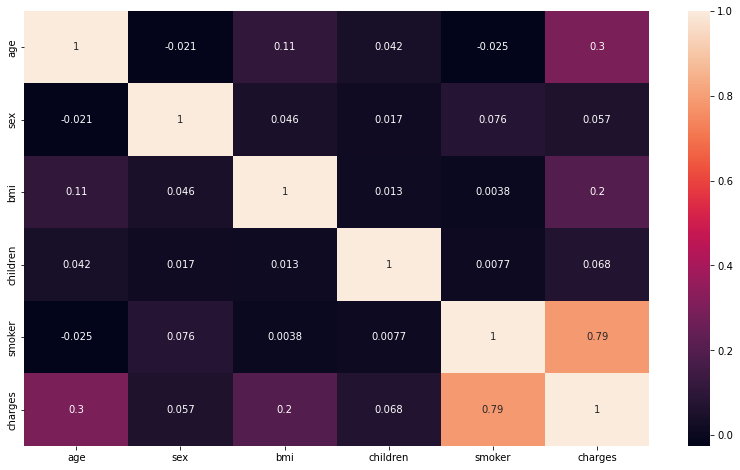

In [10]:
plt.figure(figsize = (14,8))
sns.heatmap(df.corr(), annot = True)

In [13]:
x=df.drop(['charges'],axis=1)
y=df['charges']

In [16]:
x.shape

(1338, 5)

In [17]:
y.shape

(1338,)

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)

x_train.shape

(1070, 5)

In [19]:
ada_regr=AdaBoostRegressor() 
ada_regr.fit(x_train,y_train) 

AdaBoostRegressor()

In [20]:
y_pred_test=ada_regr.predict(x_test)
y_pred_test 

array([ 8242.25368148, 13999.29930081, 13999.29930081, 17038.68339775,
        8242.25368148, 43180.86238348, 17038.68339775, 13999.29930081,
        8242.25368148, 20511.341839  , 13999.29930081, 17402.26646776,
        9952.56866457,  8242.25368148,  8005.52070292, 17038.68339775,
        8242.25368148,  9952.56866457, 19695.09485483, 13999.29930081,
       13999.29930081, 43180.86238348, 13582.67337038, 13999.29930081,
        8005.52070292,  8242.25368148,  9952.56866457, 13999.29930081,
        9952.56866457,  8242.25368148, 17402.26646776,  9952.56866457,
       26396.62910382, 39343.66229186, 26396.62910382, 13999.29930081,
       43180.86238348, 20511.341839  , 13999.29930081, 43407.97221807,
        9952.56866457, 13999.29930081, 17402.26646776, 17497.07710296,
        9952.56866457, 13999.29930081,  8242.25368148, 43180.86238348,
       13999.29930081, 17402.26646776, 13999.29930081, 17402.26646776,
        8242.25368148, 15931.32067019, 20511.341839  ,  8559.46394516,
      

In [21]:
y_pred_train=ada_regr.predict(x_train)
y_pred_train

array([13999.29930081, 17283.41656485,  8005.52070292, ...,
       43407.97221807, 20511.341839  , 17402.26646776])

# Testing Dataset Accuracy

In [28]:
y_pred_test = ada_regr.predict(x_test)

mse = mean_squared_error(y_test,y_pred_test)
print('Mean Squared error:', mse)

rmse = np.sqrt(mse)
print(rmse)


r2_score(y_test,y_pred_test)*100

Mean Squared error: 32349800.63687958
5687.688514403683


78.32954044050148

# Training Data Accuracy

In [29]:
y_pred_train=ada_regr.predict(x_train)

mse=mean_squared_error(y_train,y_pred_train)
print(mse)

rmse=np.sqrt(mse)
print(rmse)

r2_score(y_train,y_pred_train)  *100

31062954.096973818
5573.414940319249


78.70196587537042